In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import wandb
from wandb.keras import WandbCallback

In [2]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [3]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

labelNames = ["airplane", "automobile", "bird", "cat", "deer",
"dog", "frog", "horse", "ship", "truck"]

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))



In [16]:
Batch_size = 2048
lr = 0.001
epochs = 100

opt = SGD(lr= lr, decay = lr/epochs , momentum= 0.9, nesterov=True)

In [17]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])

In [18]:
H_MINI_VGG = model.fit(trainX, trainY, validation_data = (testX, testY)
                       , batch_size = Batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
25/25 [==============================] - 4s 167ms/step - loss: 2.3193 - accuracy: 0.1355 - val_loss: 2.2688 - val_accuracy: 0.1736
Epoch 2/100
25/25 [==============================] - 4s 160ms/step - loss: 2.2411 - accuracy: 0.2050 - val_loss: 2.2087 - val_accuracy: 0.2351
Epoch 3/100
25/25 [==============================] - 4s 161ms/step - loss: 2.1660 - accuracy: 0.2507 - val_loss: 2.1118 - val_accuracy: 0.2753
Epoch 4/100
25/25 [==============================] - 4s 166ms/step - loss: 2.0509 - accuracy: 0.2878 - val_loss: 1.9870 - val_accuracy: 0.3155
Epoch 5/100
25/25 [==============================] - 4s 167ms/step - loss: 1.9364 - accuracy: 0.3211 - val_loss: 1.8908 - val_accuracy: 0.3392
Epoch 6/100
25/25 [==============================] - 4s 167ms/step - loss: 1.8579 - accuracy: 0.3473 - val_loss: 1.8241 - val_accuracy: 0.3599
Epoch 7/100
25/25 [==============================] - 4s 165ms/step - loss: 1.7978 - accuracy: 0.3668 - val_loss: 1.7739 - val_accuracy: 0.3762

Epoch 58/100
25/25 [==============================] - 4s 167ms/step - loss: 1.1074 - accuracy: 0.6131 - val_loss: 1.1871 - val_accuracy: 0.5811
Epoch 59/100
25/25 [==============================] - 4s 167ms/step - loss: 1.1123 - accuracy: 0.6123 - val_loss: 1.1643 - val_accuracy: 0.5930
Epoch 60/100
25/25 [==============================] - 4s 165ms/step - loss: 1.0953 - accuracy: 0.6194 - val_loss: 1.2167 - val_accuracy: 0.5733
Epoch 61/100
25/25 [==============================] - 4s 167ms/step - loss: 1.1077 - accuracy: 0.6146 - val_loss: 1.1632 - val_accuracy: 0.5898
Epoch 62/100
25/25 [==============================] - 4s 163ms/step - loss: 1.0712 - accuracy: 0.6267 - val_loss: 1.3099 - val_accuracy: 0.5386
Epoch 63/100
25/25 [==============================] - 4s 165ms/step - loss: 1.1085 - accuracy: 0.6141 - val_loss: 1.1610 - val_accuracy: 0.5944
Epoch 64/100
25/25 [==============================] - 4s 164ms/step - loss: 1.0607 - accuracy: 0.6309 - val_loss: 1.1440 - val_accuracy:

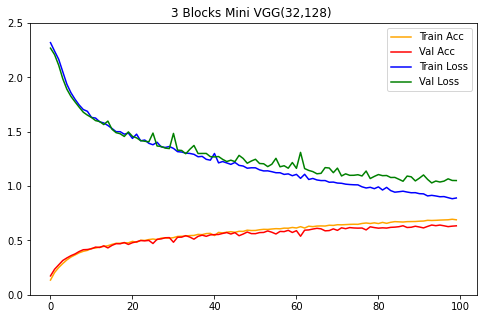

In [19]:
plt.figure(figsize=(8,5))
# plt.plot(np.arange(0,31),history.history['accuracy'], color='orange')
# plt.plot(np.arange(0,31),history.history['loss'],'b')
# plt.plot(np.arange(0,31)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
# plt.plot(np.arange(0,31)+0.5,history.history['val_loss'],'g')
plt.plot(H_MINI_VGG.history['accuracy'],color='orange')
plt.plot(H_MINI_VGG.history['val_accuracy'],'r')
plt.plot(H_MINI_VGG.history['loss'],'b')
plt.plot(H_MINI_VGG.history['val_loss'],'g')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'])
#plt.grid()
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] 
plt.title("3 Blocks Mini VGG(32,128) ")
plt.savefig("3 Blocks Mini VGG(32,128)", dpi=300,  bbox_inches='tight')
plt.show()

In [12]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

In [13]:
model1.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])
H_MINI_VGG_4blocks = model1.fit(trainX, trainY, validation_data = (testX, testY)
                       , batch_size = Batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
25/25 [==============================] - 5s 200ms/step - loss: 2.2464 - accuracy: 0.1835 - val_loss: 2.1436 - val_accuracy: 0.2564
Epoch 2/100
25/25 [==============================] - 5s 194ms/step - loss: 2.0669 - accuracy: 0.2809 - val_loss: 1.9830 - val_accuracy: 0.3106
Epoch 3/100
25/25 [==============================] - 5s 197ms/step - loss: 1.9523 - accuracy: 0.3181 - val_loss: 1.8684 - val_accuracy: 0.3425
Epoch 4/100
25/25 [==============================] - 5s 194ms/step - loss: 1.8823 - accuracy: 0.3381 - val_loss: 1.8207 - val_accuracy: 0.3574
Epoch 5/100
25/25 [==============================] - 5s 197ms/step - loss: 1.8128 - accuracy: 0.3675 - val_loss: 1.7204 - val_accuracy: 0.3946
Epoch 6/100
25/25 [==============================] - 5s 197ms/step - loss: 1.7580 - accuracy: 0.3852 - val_loss: 1.6629 - val_accuracy: 0.4175
Epoch 7/100
25/25 [==============================] - 5s 197ms/step - loss: 1.7317 - accuracy: 0.3953 - val_loss: 1.6946 - val_accuracy: 0.3946

Epoch 58/100
25/25 [==============================] - 5s 194ms/step - loss: 1.0271 - accuracy: 0.6415 - val_loss: 1.1272 - val_accuracy: 0.6021
Epoch 59/100
25/25 [==============================] - 5s 193ms/step - loss: 1.0305 - accuracy: 0.6460 - val_loss: 1.1813 - val_accuracy: 0.5838
Epoch 60/100
25/25 [==============================] - 5s 196ms/step - loss: 0.9853 - accuracy: 0.6598 - val_loss: 1.1328 - val_accuracy: 0.5960
Epoch 61/100
25/25 [==============================] - 5s 196ms/step - loss: 1.0019 - accuracy: 0.6520 - val_loss: 1.3106 - val_accuracy: 0.5539
Epoch 62/100
25/25 [==============================] - 5s 198ms/step - loss: 0.9974 - accuracy: 0.6538 - val_loss: 1.1747 - val_accuracy: 0.5821
Epoch 63/100
25/25 [==============================] - 5s 196ms/step - loss: 0.9766 - accuracy: 0.6626 - val_loss: 1.1125 - val_accuracy: 0.6066
Epoch 64/100
25/25 [==============================] - 5s 197ms/step - loss: 0.9712 - accuracy: 0.6601 - val_loss: 1.2901 - val_accuracy:

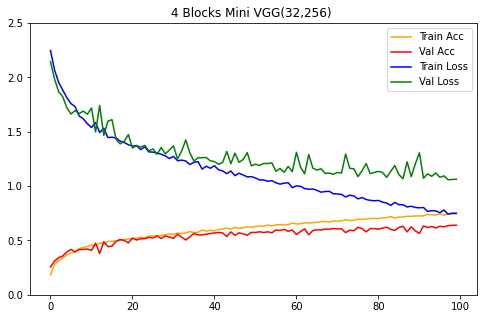

In [14]:
plt.figure(figsize=(8,5))
# plt.plot(np.arange(0,31),history.history['accuracy'], color='orange')
# plt.plot(np.arange(0,31),history.history['loss'],'b')
# plt.plot(np.arange(0,31)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
# plt.plot(np.arange(0,31)+0.5,history.history['val_loss'],'g')
plt.plot(H_MINI_VGG_4blocks.history['accuracy'],color='orange')
plt.plot(H_MINI_VGG_4blocks.history['val_accuracy'],'r')
plt.plot(H_MINI_VGG_4blocks.history['loss'],'b')
plt.plot(H_MINI_VGG_4blocks.history['val_loss'],'g')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'])
#plt.grid()
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] 
plt.title("4 Blocks Mini VGG(32,256) ")
plt.savefig("4 Blocks Mini VGG(32,256)", dpi=300,  bbox_inches='tight')
plt.show()